# ***Tarefa 3.4 - Análise Exploratória e Estatística Descritiva em Python - Visualização Gráfica***
Lucas

---

---
## Tarefa 3.4 - Análise Exploratória e Estatística Descritiva - Visualização Gráfica

Esta tarefa consiste em explorar por meio de métodos de descrição gráfica (visualização de dados) o conjunto de dados *Hourly Wages*.

Você deve implementar em Python e responder os itens solicitados abaixo utilizando a biblioteca [Matplotlib](https://matplotlib.org/) e/ou [Seaborn](https://seaborn.pydata.org/) e outras que desejar ou forem necessárias. 

Exemplos dos gráficos solicitados estão nos links das bibliotecas acima e também no notebook [Visualização_gráfica.ipynb](https://colab.research.google.com/github/malegopc/DSBD/blob/main/Notebooks/Visualização_gráfica.ipynb).

---



---



## Conjunto de dados *Hourly Wages*

Esse conjunto de dados é popularmente empregado para a tarefa de regressão em Machine Learning. Constrói-se e ajusta-se um modelo de aprendizado de máquina para predizer/estimar o salário de um funcionário em função de suas características (anos de estudos, experiência de trabalho, filiação sindical, região, ocupação e sexo). 

- Número de Instâncias: 534

- Número de Atributos: 9 atributos numéricos e o target (*wage_per_hour*)

- Informações dos Atributos:
  - union (filiação sindical)
  - education_yrs (anos de instrução)
  - experience_yrs (anos de experiência)
  - age (idade)
  - female (sexo)
  - marr (estado civil - casado)
  - south (região)
  - manufacturing (indústria)
  - construction (construção)

  
- Variável de destino (target): wage_per_hour 



## Implementar os itens abaixo:

In [1]:
#######################
# ----- IMPORTS ----- #
#######################
import io
import requests
import numpy as np
import pandas as pd  # MANIPULAR BASES DE DADOS
import seaborn as sns  # GRAPHICS GENERATION
from sklearn import metrics  # METHODS TO EVALUATE THE BEST AI TEST PERFORMANCE
import matplotlib.pyplot as plt  # GRAPHICS GENERATION
from IPython.display import display
from sklearn.linear_model import LinearRegression  # AI TRAINING TEST
from sklearn.ensemble import RandomForestRegressor  # AI TRAINING TEST
from sklearn.model_selection import train_test_split  # AI LIBRARY

################################
# ----- GLOBAL VARIABLES ----- #
################################
hw_url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Hourly_wages/hourly_wages.csv'

#### a-) Clonar o repositório de dados da disciplina (DSBD) hospedado no GitHUb.
*Obs: Você pode ignorar este item caso realize a tarefa no Jupyter Notebook. O conjunto de dados Hourly Wages pode ser baixado [clicando aqui](https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Hourly_wages/hourly_wages.csv)*.


In [2]:
hw = requests.get(hw_url).content
hw_dataset = pd.read_csv(io.StringIO(hw.decode('utf-8')))

#### b-) Ler o dataset "*Hourly_wages/hourly_wages.csv*" como dataframe utilizando a biblioteca Pandas e mostrar as 5 primeiras e 5 últimas linhas.

In [3]:
df = pd.DataFrame(hw_dataset)
df.head(5)

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [4]:
df.tail(5)

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
529,11.36,0,18,5,29,0,0,0,0,0
530,6.10,0,12,33,51,1,1,0,0,0
531,23.25,1,17,25,48,1,1,0,0,0
532,19.88,1,12,13,31,0,1,1,0,0
533,15.38,0,16,33,55,0,1,0,1,0


#### c-) Mostrar os histogramas dos atributos: *education_yrs*, *experience_yrs* e *age* num mesmo quadro de plotagem (usando *subplots*).

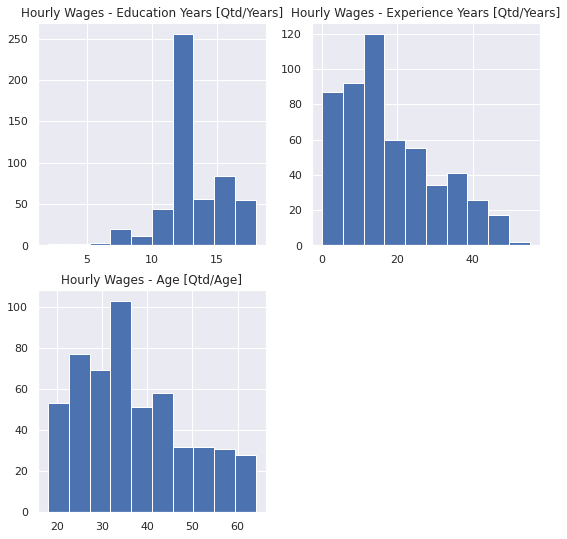

In [5]:
sns.set(rc={'figure.figsize':(9,9)})
plt.subplot(2,2,1)
plt.hist(df['education_yrs']) 
plt.title('Hourly Wages - Education Years [Qtd/Years]')
plt.subplot(2,2,2)
plt.hist(df['experience_yrs'])
plt.title('Hourly Wages - Experience Years [Qtd/Years]')
plt.subplot(2,2,3)
plt.hist(df['age']) 
plt.title('Hourly Wages - Age [Qtd/Age]')
plt.show()

#### d-) Mostrar os gráficos de setores (*pie chart*) de cada um dos atributos: *union*, *female*, *marr*, *south*, *manufacturing* e *construction* num mesmo quadro de plotagem (usando subplots).

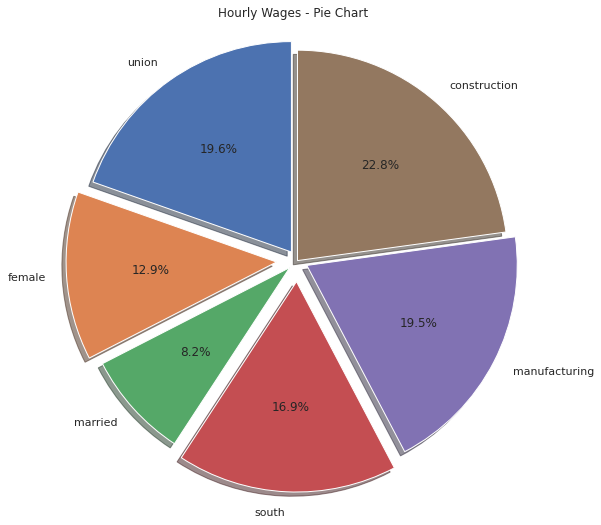

In [6]:
index = len(df.index)
prop_union      = (df[df.union==0].count()[0]/index)*100
prop_female     = (df[df.female==0].count()[0]/index)*100
prop_marr       = (df[df.marr==0].count()[0]/index)*100
prop_south      = (df[df.south==0].count()[0]/index)*100
prop_manufact   = (df[df.manufacturing==0].count()[0]/index)*100
prop_construct  = (df[df.construction==0].count()[0]/index)*100

labels = 'union', 'female', 'married','south', 'manufacturing', 'construction'
sizes = [prop_union, prop_female, prop_marr, prop_south, prop_manufact, prop_construct] 
explode = (0.05, 0.1, 0.05, 0.1, 0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Hourly Wages - Pie Chart')
plt.show()

#### e-) Mostrar os boxplots das variáveis *education_yrs*, *experience_yrs* e *age* num mesmo quadro de plotagem (usando *subplots*).

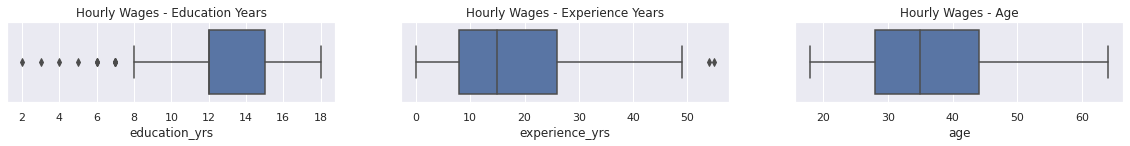

In [7]:
variables = df[["education_yrs", "experience_yrs", "age"]]

sns.set(rc={'figure.figsize':(20,5)})

plt.subplot(3,3,1)
plt.title('Hourly Wages - Education Years')
sns.boxplot(x=variables['education_yrs'])

plt.subplot(3,3,2)
plt.title('Hourly Wages - Experience Years')
sns.boxplot(x=variables['experience_yrs'])

plt.subplot(3,3,3)
plt.title('Hourly Wages - Age')
sns.boxplot(x=variables['age'])
plt.show()

#### f-) Mostre lado a lado os boxplots da variável *age* discriminados por sexo (female). 

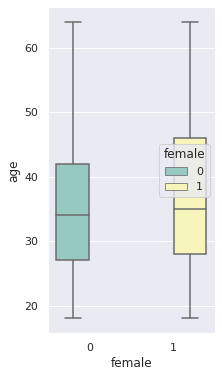

In [8]:
sns.set(rc={'figure.figsize':(3,6)})

df_f = df[["female", "age"]]
sns.boxplot(y='age', x='female', data=df_f, hue='female', palette="Set3")
plt.show()

#### g-) Responda observando os boxplots construídos no item anterior: 

i-) Qual sexo apresenta maior variabilidade (dispersão) de idade? Resposta:

ii-) Qual é aproximadamente o 2o. quartil das idades das mulheres? Resposta:

iii-) Qual é aproximadamente o 1o. quartil das idades dos homens? Resposta:


i. *Female*

ii. *Aproximadamente 37*

iii. *Aproximadamente 27*

#### h-) Mostre lado a lado os boxplots da variável *wage_per_hour* discriminados por sexo (female). 

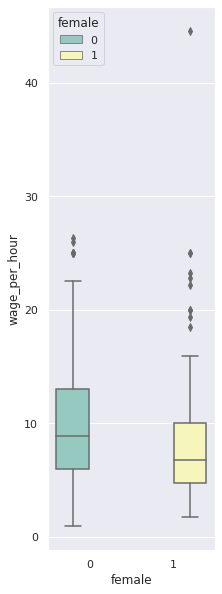

In [9]:
sns.set(rc={'figure.figsize':(3,10)})

df_f = df[["female", "wage_per_hour"]]
sns.boxplot(y='wage_per_hour', x='female', data=df_f, hue='female', palette="Set3")
plt.show()

#### i-) Análise comparativamente os boxplots do item anterior e comente as informações que podem ser exploradas a respeito dos salários por hora de homens e mulhores. Quais conclusões podemos obter?

Resposta:

*>> Salário/Hora Mulheres:*
* *Q1: Aprox. 6*
* *Q2 (Mediana): Aprox. 7*
* *Q3: 10*
* *Min: Aprox. 2*
* *Max: Aprox. 16*

*>> Salário/Hora Homens:*
* *Q1: Aprox. 7*
* *Q2 (Mediana): Aprox. 9*
* *Q3: Aprox. 13*
* *Min: Aprox. 1*
* *Max: Aprox. 23*

*Pode ser notado que a maioria dos homens tendem a ganhar mais, por hora trabalhada, se comparado à mulheres. Mesmo havendo um outlier com valor fora do padrão nos dados femininos.*

#### j-) Mostre lado a lado os boxplots da variável wage_per_hour discriminados por estado civil (marr).

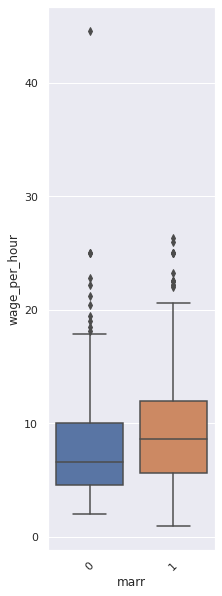

In [10]:
sns.set(rc={'figure.figsize':(3,10)})
ax=sns.boxplot(x='marr', y='wage_per_hour', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

#### k-) Análise comparativamente os boxplots do item anterior e comente as informações que podem ser exploradas a respeito dos salários por hora de casados e não casados. Quais conclusões podemos obter?

Resposta:

*>> Salário/Hora Casados:*
* *Q1: Aprox. 6*
* *Q2 (Mediana): Aprox. 9*
* *Q3: 12*
* *Min: Aprox. 1*
* *Max: Aprox. 21*

*>> Salário/Hora Solteiros:*
* *Q1: Aprox. 5*
* *Q2 (Mediana): Aprox. 7*
* *Q3: Aprox. 10*
* *Min: Aprox. 2*
* *Max: Aprox. 18*

*A dispersão dos valores entre os grupos é aproximada. Entretanto, casados tendem a receber maiores salários.*